In [ ]:
!python --version

Python 3.10.12


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout,LSTM

**Train-Test Split**

In [ ]:
# from sklearn.model_selection import train_test_split
# xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 1)
# # xtrain = xtrain.to_numpy()
# # xtest = xtest.to_numpy()

# **CNN+LSTM(LSA)**

**Imbalanced**

In [ ]:
# df = pd.read_csv('/content/LSA_DPI_Dataset.csv')
# columns = df.columns.tolist()
# # Filter the columns to remove data we do not want
# columns = [c for c in columns if c not in ["Target"]]
# # Store the variable we are predicting
# target = "Target"
# X = df[columns]
# Y = df[target]

In [ ]:
df = pd.read_csv('/content/LSA_DPI_Dataset.csv')
columns = df.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df[columns]
Y = df[target]

X = X.to_numpy()
X = X.reshape(X.shape[0], X.shape[1], 1)

kf = KFold(n_splits=5, shuffle=True)
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = Y[train_index], Y[val_index]

# def CNN_LSTM(optimizer='sgd', kernel_size=3, filters1=32, filters2=64, pool_size=2, lstm_units=64, dense_units=1, dropout_rate=0.5, reg_param=0.01):
#     model = Sequential()
#     model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
#     model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
#     # cnn.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
#     model.add(MaxPool1D(pool_size=4))
#     model.add(LSTM(256, activation='relu'))
#     model.add(Flatten())
#     model.add(Dense(64, activation='relu'))
#     model.add(Dense(1, activation='sigmoid'))
#     model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#     return model



In [ ]:
# fold_metrics = []

In [ ]:

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
# model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool1D(pool_size=4))
model.add(LSTM(256, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 18, 64)            256       
                                                                 
 conv1d_1 (Conv1D)           (None, 16, 128)           24704     
                                                                 
 max_pooling1d (MaxPooling1  (None, 4, 128)            0         
 D)                                                              
                                                                 
 lstm (LSTM)                 (None, 256)               394240    
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                      

In [ ]:
history = model.fit(X_train, y_train, epochs = 75, batch_size= 64)

Epoch 1/75
26/26 [==============================] - 6s 62ms/step - loss: 0.6930 - accuracy: 0.5103
Epoch 2/75
26/26 [==============================] - 2s 82ms/step - loss: 0.6929 - accuracy: 0.5152
Epoch 3/75
26/26 [==============================] - 2s 73ms/step - loss: 0.6929 - accuracy: 0.5152
Epoch 4/75
26/26 [==============================] - 2s 70ms/step - loss: 0.6928 - accuracy: 0.5152
Epoch 5/75
26/26 [==============================] - 2s 64ms/step - loss: 0.6929 - accuracy: 0.5152
Epoch 6/75
26/26 [==============================] - 2s 75ms/step - loss: 0.6927 - accuracy: 0.5152
Epoch 7/75
26/26 [==============================] - 2s 62ms/step - loss: 0.6928 - accuracy: 0.5170
Epoch 8/75
26/26 [==============================] - 2s 61ms/step - loss: 0.6928 - accuracy: 0.5176
Epoch 9/75
26/26 [==============================] - 2s 60ms/step - loss: 0.6926 - accuracy: 0.5121
Epoch 10/75
26/26 [==============================] - 2s 71ms/step - loss: 0.6919 - accuracy: 0.5170
Epoch 11/

In [ ]:
pred = model.predict(X_val)
y_pred_classes = np.round(pred).astype(int)

13/13 [==============================] - 0s 12ms/step


In [ ]:
accuracy_score(y_val, y_pred_classes), recall_score(y_val, y_pred_classes), precision_score(y_val, y_pred_classes), cohen_kappa_score(y_val, y_pred_classes), matthews_corrcoef(y_val, y_pred_classes)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.5169902912621359, 0.0, 0.0, 0.0, 0.0)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = y_pred_classes.flatten()

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = roc_auc_score(y_val, y_pred_proba)

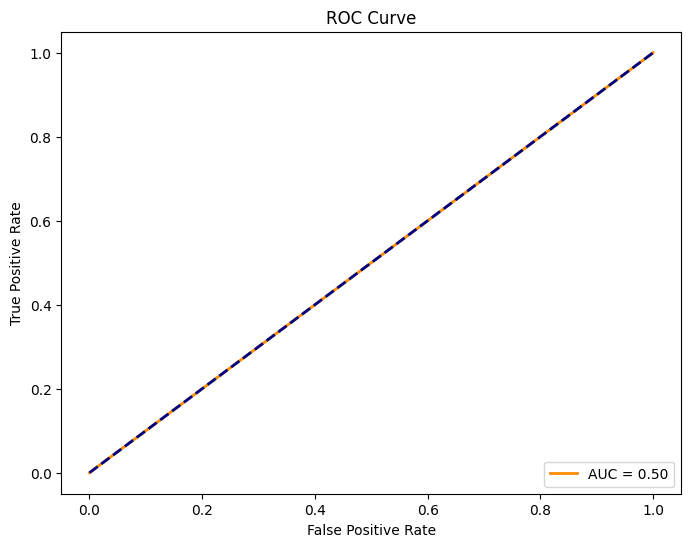

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
cm1 = confusion_matrix(y_val, y_pred_classes)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

0.9942196531791907

**Test**

In [ ]:
df1 = pd.read_csv('/content/LSA_TR.csv')
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [ ]:
sample_size = xtrain.shape[0] # number of samples in train set
time_steps  = xtrain.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

In [ ]:
train_data_reshaped = xtrain.values.reshape(sample_size,time_steps,input_dimension)
n_timesteps = train_data_reshaped.shape[1]
n_features  = train_data_reshaped.shape[2]

In [ ]:
cnn = Sequential()

In [ ]:
cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
cnn.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
# cnn.add(Conv1D(filters=128, kernel_size=3, activation='relu'))

In [ ]:
cnn.add(MaxPool1D(pool_size=4))

In [ ]:
cnn.add(LSTM(256, activation='relu'))

In [ ]:
cnn.add(Flatten())

In [ ]:
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.fit(xtrain, ytrain, epochs = 75, batch_size= 64)

Epoch 1/75
36/36 [==============================] - 9s 135ms/step - loss: 0.5558 - accuracy: 0.8127
Epoch 2/75
36/36 [==============================] - 6s 181ms/step - loss: 0.4911 - accuracy: 0.8127
Epoch 3/75
36/36 [==============================] - 5s 130ms/step - loss: 0.4891 - accuracy: 0.8127
Epoch 4/75
36/36 [==============================] - 5s 148ms/step - loss: 0.4854 - accuracy: 0.8127
Epoch 5/75
36/36 [==============================] - 5s 144ms/step - loss: 0.4813 - accuracy: 0.8127
Epoch 6/75
36/36 [==============================] - 5s 127ms/step - loss: 0.4656 - accuracy: 0.8127
Epoch 7/75
36/36 [==============================] - 4s 111ms/step - loss: 0.4102 - accuracy: 0.8251
Epoch 8/75
36/36 [==============================] - 3s 93ms/step - loss: 0.3715 - accuracy: 0.8454
Epoch 9/75
36/36 [==============================] - 3s 85ms/step - loss: 0.3509 - accuracy: 0.8494
Epoch 10/75
36/36 [==============================] - 3s 86ms/step - loss: 0.3209 - accuracy: 0.8636
Ep

In [ ]:
pred = cnn.predict(xtest)
pred = (pred > 0.5)

31/31 [==============================] - 1s 16ms/step


In [ ]:
accuracy_score(ytest, pred), precision_score(ytest, pred), recall_score(ytest, pred), f1_score(ytest, pred), cohen_kappa_score(ytest, pred), matthews_corrcoef(ytest, pred)

(0.9742002063983488,
 0.966824644549763,
 0.918918918918919,
 0.9422632794457275,
 0.9256657860095184,
 0.9261612997336975)

In [ ]:
cm1 = confusion_matrix(ytest, pred)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

NameError: ignored

**ADASYN**

In [ ]:
df1 = pd.read_csv('/content/LSA_TR.csv')

In [ ]:
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
from imblearn.over_sampling import ADASYN
ada = ADASYN()
X, Y = ada.fit_resample(X, Y)

In [ ]:
X = X.to_numpy()
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
kf = KFold(n_splits=5, shuffle=True)
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = Y[train_index], Y[val_index]

In [ ]:
cnn = Sequential()

In [ ]:
cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
#cnn.add(Conv1D(filters=128, kernel_size=3, activation='relu'))

In [ ]:
cnn.add(MaxPool1D(pool_size=4))

In [ ]:
cnn.add(LSTM(256, activation='relu'))

In [ ]:
cnn.add(Flatten())

In [ ]:
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs = 75, batch_size= 64)

Epoch 1/75
66/66 [==============================] - 12s 145ms/step - loss: 0.6340 - accuracy: 0.6414
Epoch 2/75
66/66 [==============================] - 9s 139ms/step - loss: 0.5049 - accuracy: 0.7913
Epoch 3/75
66/66 [==============================] - 8s 126ms/step - loss: 0.4412 - accuracy: 0.8107
Epoch 4/75
66/66 [==============================] - 9s 142ms/step - loss: 0.2866 - accuracy: 0.8921
Epoch 5/75
66/66 [==============================] - 9s 143ms/step - loss: 0.2303 - accuracy: 0.9132
Epoch 6/75
66/66 [==============================] - 9s 132ms/step - loss: 0.1936 - accuracy: 0.9268
Epoch 7/75
66/66 [==============================] - 9s 128ms/step - loss: 0.1899 - accuracy: 0.9312
Epoch 8/75
66/66 [==============================] - 6s 96ms/step - loss: 0.1628 - accuracy: 0.9422
Epoch 9/75
66/66 [==============================] - 6s 91ms/step - loss: 0.1312 - accuracy: 0.9539
Epoch 10/75
66/66 [==============================] - 6s 90ms/step - loss: 0.1206 - accuracy: 0.9597
E

In [ ]:
pred = cnn.predict(X_val)
y_pred_classes = np.round(pred).astype(int)

33/33 [==============================] - 1s 16ms/step


In [ ]:
accuracy_score(y_val, y_pred_classes), recall_score(y_val, y_pred_classes), precision_score(y_val, y_pred_classes), cohen_kappa_score(y_val, y_pred_classes), matthews_corrcoef(y_val, y_pred_classes)

(0.9932821497120922,
 0.9981916817359855,
 0.989247311827957,
 0.9865054374169772,
 0.9865512686249185)

In [ ]:
cm1 = confusion_matrix(y_val, y_pred_classes)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

0.9877300613496932

**SMOTETomek**

In [ ]:
df1 = pd.read_csv('/content/LSA_TR.csv')

In [ ]:
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek()
X, Y = smt.fit_resample(X, Y)

In [ ]:
X = X.to_numpy()
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
kf = KFold(n_splits=5, shuffle=True)
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = Y[train_index], Y[val_index]

In [ ]:
cnn = Sequential()

In [ ]:
cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
#cnn.add(Conv1D(filters=128, kernel_size=3, activation='relu'))

In [ ]:
cnn.add(MaxPool1D(pool_size=4))

In [ ]:
cnn.add(LSTM(256, activation='relu'))

In [ ]:
cnn.add(Flatten())

In [ ]:
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs = 75, batch_size= 64)

Epoch 1/75
65/65 [==============================] - 13s 146ms/step - loss: 0.6366 - accuracy: 0.5990
Epoch 2/75
65/65 [==============================] - 10s 155ms/step - loss: 0.5269 - accuracy: 0.7481
Epoch 3/75
65/65 [==============================] - 8s 131ms/step - loss: 0.4201 - accuracy: 0.8028
Epoch 4/75
65/65 [==============================] - 9s 141ms/step - loss: 0.2474 - accuracy: 0.8974
Epoch 5/75
65/65 [==============================] - 8s 124ms/step - loss: 0.1833 - accuracy: 0.9293
Epoch 6/75
65/65 [==============================] - 6s 85ms/step - loss: 0.1623 - accuracy: 0.9397
Epoch 7/75
65/65 [==============================] - 7s 104ms/step - loss: 0.1354 - accuracy: 0.9504
Epoch 8/75
65/65 [==============================] - 6s 85ms/step - loss: 0.1025 - accuracy: 0.9620
Epoch 9/75
65/65 [==============================] - 7s 105ms/step - loss: 0.1052 - accuracy: 0.9647
Epoch 10/75
65/65 [==============================] - 6s 87ms/step - loss: 0.0733 - accuracy: 0.9719


In [ ]:
pred = cnn.predict(X_val)
y_pred_classes = np.round(pred).astype(int)

33/33 [==============================] - 1s 18ms/step


In [ ]:
accuracy_score(y_val, y_pred_classes), recall_score(y_val, y_pred_classes), precision_score(y_val, y_pred_classes), cohen_kappa_score(y_val, y_pred_classes), matthews_corrcoef(y_val, y_pred_classes)

(0.9874031007751938,
 0.9980657640232108,
 0.9772727272727273,
 0.974805066029657,
 0.9750266615438313)

In [ ]:
cm1 = confusion_matrix(y_val, y_pred_classes)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

0.9766990291262136

**NearMiss**

In [ ]:
df1 = pd.read_csv('/content/LSA_TR.csv')

In [ ]:
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X, Y = nm.fit_resample(X, Y)

In [ ]:
X = X.to_numpy()
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
kf = KFold(n_splits=5, shuffle=True)
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = Y[train_index], Y[val_index]

In [ ]:
cnn = Sequential()

In [ ]:
cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
#cnn.add(Conv1D(filters=128, kernel_size=3, activation='relu'))

In [ ]:
cnn.add(MaxPool1D(pool_size=4))

In [ ]:
cnn.add(LSTM(256, activation='relu'))

In [ ]:
cnn.add(Flatten())

In [ ]:
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs = 75, batch_size= 64)

Epoch 1/75
17/17 [==============================] - 6s 125ms/step - loss: 0.6862 - accuracy: 0.5058
Epoch 2/75
17/17 [==============================] - 3s 185ms/step - loss: 0.5644 - accuracy: 0.6599
Epoch 3/75
17/17 [==============================] - 2s 125ms/step - loss: 0.5239 - accuracy: 0.8537
Epoch 4/75
17/17 [==============================] - 2s 128ms/step - loss: 0.4663 - accuracy: 0.8411
Epoch 5/75
17/17 [==============================] - 2s 122ms/step - loss: 0.4032 - accuracy: 0.8866
Epoch 6/75
17/17 [==============================] - 2s 122ms/step - loss: 0.3402 - accuracy: 0.8866
Epoch 7/75
17/17 [==============================] - 2s 133ms/step - loss: 0.3063 - accuracy: 0.8837
Epoch 8/75
17/17 [==============================] - 3s 173ms/step - loss: 0.3016 - accuracy: 0.8847
Epoch 9/75
17/17 [==============================] - 2s 128ms/step - loss: 0.2450 - accuracy: 0.9128
Epoch 10/75
17/17 [==============================] - 2s 147ms/step - loss: 0.2185 - accuracy: 0.9186

In [ ]:
pred = cnn.predict(X_val)
y_pred_classes = np.round(pred).astype(int)

9/9 [==============================] - 0s 16ms/step


In [ ]:
accuracy_score(y_val, y_pred_classes), recall_score(y_val, y_pred_classes), precision_score(y_val, y_pred_classes), cohen_kappa_score(y_val, y_pred_classes), matthews_corrcoef(y_val, y_pred_classes)

(1.0, 1.0, 1.0, 1.0, 1.0)

In [ ]:
cm1 = confusion_matrix(y_val, y_pred_classes)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

1.0

# **CNN+LSTM(NMBroto)**

**Imbalanced**

In [ ]:
df2 = pd.read_csv('/content/NMB-TR.csv')
columns = df2.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df2[columns]
Y = df2[target]

In [ ]:
X = X.to_numpy()
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
kf = KFold(n_splits=5, shuffle=True)
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = Y[train_index], Y[val_index]

In [ ]:
cnn = Sequential()
cnn.add(Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
#cnn.add(Conv1D(filters=128, kernel_size=3, activation='relu'))

In [ ]:
cnn.add(MaxPool1D(pool_size=2))
cnn.add(LSTM(128, activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs = 75, batch_size= 64)

Epoch 1/75
41/41 [==============================] - 5s 65ms/step - loss: 0.5529 - accuracy: 0.7874
Epoch 2/75
41/41 [==============================] - 3s 64ms/step - loss: 0.5096 - accuracy: 0.7982
Epoch 3/75
41/41 [==============================] - 3s 80ms/step - loss: 0.5042 - accuracy: 0.7982
Epoch 4/75
41/41 [==============================] - 3s 75ms/step - loss: 0.4972 - accuracy: 0.7982
Epoch 5/75
41/41 [==============================] - 3s 64ms/step - loss: 0.4927 - accuracy: 0.7982
Epoch 6/75
41/41 [==============================] - 3s 65ms/step - loss: 0.4863 - accuracy: 0.7982
Epoch 7/75
41/41 [==============================] - 3s 64ms/step - loss: 0.4781 - accuracy: 0.7982
Epoch 8/75
41/41 [==============================] - 4s 92ms/step - loss: 0.4686 - accuracy: 0.7982
Epoch 9/75
41/41 [==============================] - 3s 63ms/step - loss: 0.4609 - accuracy: 0.7982
Epoch 10/75
41/41 [==============================] - 3s 65ms/step - loss: 0.4558 - accuracy: 0.8005
Epoch 11/

In [ ]:
pred = cnn.predict(X_val)
y_pred_classes = np.round(pred).astype(int)

21/21 [==============================] - 0s 9ms/step


In [ ]:
accuracy_score(y_val, y_pred_classes), recall_score(y_val, y_pred_classes), precision_score(y_val, y_pred_classes), cohen_kappa_score(y_val, y_pred_classes), matthews_corrcoef(y_val, y_pred_classes)

(0.9457364341085271,
 0.9919354838709677,
 0.7834394904458599,
 0.8413663225797384,
 0.8509382666350289)

In [ ]:
cm1 = confusion_matrix(y_val, y_pred_classes)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

0.9347408829174664

**Test**

In [ ]:
df2 = pd.read_csv('/content/NMB-TR.csv')
columns = df2.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df2[columns]
Y = df2[target]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [ ]:
sample_size = xtrain.shape[0] # number of samples in train set
time_steps  = xtrain.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

In [ ]:
train_data_reshaped = xtrain.values.reshape(sample_size,time_steps,input_dimension)
n_timesteps = train_data_reshaped.shape[1]
n_features  = train_data_reshaped.shape[2]

In [ ]:
cnn = Sequential()

In [ ]:
cnn.add(Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
cnn.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
# cnn.add(Conv1D(filters=128, kernel_size=3, activation='relu'))

In [ ]:
cnn.add(MaxPool1D(pool_size=2))

In [ ]:
cnn.add(LSTM(128, activation='relu'))

In [ ]:
cnn.add(Flatten())

In [ ]:
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.fit(xtrain, ytrain, epochs = 75, batch_size= 64)

Epoch 1/75
36/36 [==============================] - 10s 117ms/step - loss: 0.5375 - accuracy: 0.7958
Epoch 2/75
36/36 [==============================] - 4s 115ms/step - loss: 0.4882 - accuracy: 0.8127
Epoch 3/75
36/36 [==============================] - 5s 130ms/step - loss: 0.4827 - accuracy: 0.8127
Epoch 4/75
36/36 [==============================] - 5s 141ms/step - loss: 0.4837 - accuracy: 0.8127
Epoch 5/75
36/36 [==============================] - 6s 152ms/step - loss: 0.4766 - accuracy: 0.8127
Epoch 6/75
36/36 [==============================] - 4s 118ms/step - loss: 0.4740 - accuracy: 0.8127
Epoch 7/75
36/36 [==============================] - 5s 136ms/step - loss: 0.4640 - accuracy: 0.8127
Epoch 8/75
36/36 [==============================] - 4s 114ms/step - loss: 0.4603 - accuracy: 0.8127
Epoch 9/75
36/36 [==============================] - 4s 101ms/step - loss: 0.4519 - accuracy: 0.8127
Epoch 10/75
36/36 [==============================] - 5s 130ms/step - loss: 0.4443 - accuracy: 0.814

In [ ]:
pred = cnn.predict(xtest)
pred = (pred > 0.5)

31/31 [==============================] - 1s 10ms/step


In [ ]:
accuracy_score(ytest, pred), precision_score(ytest, pred), recall_score(ytest, pred), f1_score(ytest, pred), cohen_kappa_score(ytest, pred), matthews_corrcoef(ytest, pred)

(0.9277605779153767,
 0.7900763358778626,
 0.9324324324324325,
 0.8553719008264463,
 0.8076661335873967,
 0.8125887237278647)

In [ ]:
cm1 = confusion_matrix(ytest, pred)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

0.9263721552878179

**ADASYN**

In [ ]:
df2 = pd.read_csv('/content/NMB-TR.csv')
columns = df2.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df2[columns]
Y = df2[target]

In [ ]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=42)
X, Y = ada.fit_resample(X, Y)

In [ ]:
X = X.to_numpy()
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
kf = KFold(n_splits=5, shuffle=True)
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = Y[train_index], Y[val_index]

In [ ]:
cnn = Sequential()
cnn.add(Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
#cnn.add(Conv1D(filters=128, kernel_size=3, activation='relu'))

In [ ]:
cnn.add(MaxPool1D(pool_size=2))
cnn.add(LSTM(128, activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs = 75, batch_size= 64)

Epoch 1/75
66/66 [==============================] - 9s 104ms/step - loss: 0.6884 - accuracy: 0.5268
Epoch 2/75
66/66 [==============================] - 7s 98ms/step - loss: 0.6662 - accuracy: 0.6145
Epoch 3/75
66/66 [==============================] - 7s 111ms/step - loss: 0.6298 - accuracy: 0.6684
Epoch 4/75
66/66 [==============================] - 5s 78ms/step - loss: 0.5807 - accuracy: 0.7054
Epoch 5/75
66/66 [==============================] - 6s 85ms/step - loss: 0.5069 - accuracy: 0.7635
Epoch 6/75
66/66 [==============================] - 5s 81ms/step - loss: 0.4210 - accuracy: 0.8136
Epoch 7/75
66/66 [==============================] - 4s 64ms/step - loss: 0.3471 - accuracy: 0.8462
Epoch 8/75
66/66 [==============================] - 5s 81ms/step - loss: 0.2596 - accuracy: 0.8977
Epoch 9/75
66/66 [==============================] - 4s 65ms/step - loss: 0.2189 - accuracy: 0.9135
Epoch 10/75
66/66 [==============================] - 4s 67ms/step - loss: 0.1820 - accuracy: 0.9323
Epoch 1

In [ ]:
pred = cnn.predict(X_val)
y_pred_classes = np.round(pred).astype(int)

33/33 [==============================] - 1s 9ms/step


In [ ]:
accuracy_score(y_val, y_pred_classes), recall_score(y_val, y_pred_classes), precision_score(y_val, y_pred_classes), cohen_kappa_score(y_val, y_pred_classes), matthews_corrcoef(y_val, y_pred_classes)

(0.9494274809160306,
 0.9961685823754789,
 0.9106830122591943,
 0.8988895765828084,
 0.9028429366644708)

In [ ]:
cm1 = confusion_matrix(y_val, y_pred_classes)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

0.903041825095057

**SMOTETomek**

In [ ]:
df2 = pd.read_csv('/content/NMB-TR.csv')
columns = df2.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df2[columns]
Y = df2[target]

In [ ]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek()
X, Y = smt.fit_resample(X, Y)

In [ ]:
X = X.to_numpy()
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
kf = KFold(n_splits=5, shuffle=True)
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = Y[train_index], Y[val_index]

In [ ]:
cnn = Sequential()
cnn.add(Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
#cnn.add(Conv1D(filters=128, kernel_size=3, activation='relu'))

In [ ]:
cnn.add(MaxPool1D(pool_size=2))
cnn.add(LSTM(128, activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs = 75, batch_size= 64)

Epoch 1/75
65/65 [==============================] - 9s 83ms/step - loss: 0.6862 - accuracy: 0.5288
Epoch 2/75
65/65 [==============================] - 5s 81ms/step - loss: 0.6570 - accuracy: 0.6184
Epoch 3/75
65/65 [==============================] - 6s 87ms/step - loss: 0.5975 - accuracy: 0.6981
Epoch 4/75
65/65 [==============================] - 5s 72ms/step - loss: 0.5456 - accuracy: 0.7337
Epoch 5/75
65/65 [==============================] - 7s 107ms/step - loss: 0.4896 - accuracy: 0.7709
Epoch 6/75
65/65 [==============================] - 6s 94ms/step - loss: 0.4261 - accuracy: 0.8114
Epoch 7/75
65/65 [==============================] - 5s 79ms/step - loss: 0.3696 - accuracy: 0.8400
Epoch 8/75
65/65 [==============================] - 5s 81ms/step - loss: 0.3437 - accuracy: 0.8482
Epoch 9/75
65/65 [==============================] - 4s 63ms/step - loss: 0.2851 - accuracy: 0.8857
Epoch 10/75
65/65 [==============================] - 4s 65ms/step - loss: 0.2107 - accuracy: 0.9148
Epoch 11

In [ ]:
pred = cnn.predict(X_val)
y_pred_classes = np.round(pred).astype(int)

33/33 [==============================] - 0s 8ms/step


In [ ]:
accuracy_score(y_val, y_pred_classes), recall_score(y_val, y_pred_classes), precision_score(y_val, y_pred_classes), cohen_kappa_score(y_val, y_pred_classes), matthews_corrcoef(y_val, y_pred_classes)

(0.9815891472868217,
 1.0,
 0.9646182495344506,
 0.9631724852937862,
 0.9638263094081329)

In [ ]:
cm1 = confusion_matrix(y_val, y_pred_classes)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

0.9630350194552529

**NearMiss**

In [ ]:
df2 = pd.read_csv('/content/NMB-TR.csv')
columns = df2.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df2[columns]
Y = df2[target]

In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X, Y = nm.fit_resample(X, Y)

In [ ]:
X = X.to_numpy()
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
kf = KFold(n_splits=5, shuffle=True)
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = Y[train_index], Y[val_index]

In [ ]:
cnn = Sequential()
cnn.add(Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
#cnn.add(Conv1D(filters=128, kernel_size=3, activation='relu'))

In [ ]:
cnn.add(MaxPool1D(pool_size=2))
cnn.add(LSTM(128, activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs = 70, batch_size= 64)

Epoch 1/70
17/17 [==============================] - 5s 67ms/step - loss: 0.6703 - accuracy: 0.5010
Epoch 2/70
17/17 [==============================] - 1s 66ms/step - loss: 0.5871 - accuracy: 0.6269
Epoch 3/70
17/17 [==============================] - 1s 65ms/step - loss: 0.5822 - accuracy: 0.7578
Epoch 4/70
17/17 [==============================] - 1s 65ms/step - loss: 0.5415 - accuracy: 0.7403
Epoch 5/70
17/17 [==============================] - 1s 66ms/step - loss: 0.5051 - accuracy: 0.7422
Epoch 6/70
17/17 [==============================] - 1s 65ms/step - loss: 0.4780 - accuracy: 0.7607
Epoch 7/70
17/17 [==============================] - 1s 66ms/step - loss: 0.4708 - accuracy: 0.7636
Epoch 8/70
17/17 [==============================] - 1s 66ms/step - loss: 0.4544 - accuracy: 0.7694
Epoch 9/70
17/17 [==============================] - 1s 65ms/step - loss: 0.4560 - accuracy: 0.7607
Epoch 10/70
17/17 [==============================] - 2s 107ms/step - loss: 0.4454 - accuracy: 0.7597
Epoch 11

In [ ]:
pred = cnn.predict(X_val)
y_pred_classes = np.round(pred).astype(int)

9/9 [==============================] - 0s 8ms/step


In [ ]:
accuracy_score(y_val, y_pred_classes), recall_score(y_val, y_pred_classes), precision_score(y_val, y_pred_classes), cohen_kappa_score(y_val, y_pred_classes), matthews_corrcoef(y_val, y_pred_classes)

(0.937984496124031,
 0.9836065573770492,
 0.8955223880597015,
 0.8762293115855121,
 0.8800291385253443)

In [ ]:
cm1 = confusion_matrix(y_val, y_pred_classes)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

0.8970588235294118

# **LSTM(LSA)**

**Imbalanced**

In [ ]:
df1 = pd.read_csv('/content/LSA_TR.csv')

In [ ]:
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
X = X.to_numpy()
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
kf = KFold(n_splits=5, shuffle=True)
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = Y[train_index], Y[val_index]

In [ ]:
model = Sequential()
model.add(LSTM(units=256, input_shape=(X_train.shape[1], 1), return_sequences= True, activation = 'relu'))
model.add(LSTM(256,return_sequences= True,  activation = 'relu'))
model.add(LSTM(128,return_sequences= True,  activation = 'relu'))
model.add(LSTM(64,return_sequences= True,  activation = 'relu'))
model.add(Dense(units=1, activation='sigmoid'))  # Replace '1' with the number of output classes if you have a classification task
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=75, batch_size=64)

Epoch 1/75
41/41 [==============================] - 50s 1s/step - loss: 0.5933 - accuracy: 0.8028
Epoch 2/75
41/41 [==============================] - 37s 888ms/step - loss: 0.5198 - accuracy: 0.8029
Epoch 3/75
41/41 [==============================] - 32s 795ms/step - loss: 0.5090 - accuracy: 0.8029
Epoch 4/75
41/41 [==============================] - 32s 784ms/step - loss: 0.4953 - accuracy: 0.8027
Epoch 5/75
41/41 [==============================] - 33s 817ms/step - loss: 0.4731 - accuracy: 0.8058
Epoch 6/75
41/41 [==============================] - 32s 783ms/step - loss: 0.4445 - accuracy: 0.8137
Epoch 7/75
41/41 [==============================] - 34s 823ms/step - loss: 0.4283 - accuracy: 0.8165
Epoch 8/75
41/41 [==============================] - 34s 820ms/step - loss: 0.3927 - accuracy: 0.8319
Epoch 9/75
41/41 [==============================] - 36s 888ms/step - loss: 0.3730 - accuracy: 0.8395
Epoch 10/75
41/41 [==============================] - 32s 776ms/step - loss: 0.3453 - accuracy:

In [ ]:
pred = cnn.predict(X_val)
y_pred_classes = np.round(pred).astype(int)

21/21 [==============================] - 0s 18ms/step


In [ ]:
accuracy_score(y_val, y_pred_classes), recall_score(y_val, y_pred_classes), precision_score(y_val, y_pred_classes), cohen_kappa_score(y_val, y_pred_classes), matthews_corrcoef(y_val, y_pred_classes)

(0.8480620155038759,
 1.0,
 0.5811965811965812,
 0.6388041279528234,
 0.6850520105185522)

In [ ]:
cm1 = confusion_matrix(y_val, y_pred_classes)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

0.8074656188605108

# **CNN(LSA)**

**Imbalanced**

In [ ]:
df1 = pd.read_csv('/content/LSA_TR.csv')

In [ ]:
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
X = X.to_numpy()
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
kf = KFold(n_splits=5, shuffle=True)
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = Y[train_index], Y[val_index]

In [ ]:
cnn = Sequential()

In [ ]:
cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
cnn.add(Conv1D(filters=256, kernel_size=3, activation='relu'))

In [ ]:
cnn.add(MaxPool1D(pool_size=2))

In [ ]:
cnn.add(Flatten())

In [ ]:
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs = 75, batch_size= 64)

Epoch 1/75
41/41 [==============================] - 5s 86ms/step - loss: 0.5231 - accuracy: 0.7932
Epoch 2/75
41/41 [==============================] - 4s 106ms/step - loss: 0.4710 - accuracy: 0.8033
Epoch 3/75
41/41 [==============================] - 4s 101ms/step - loss: 0.4076 - accuracy: 0.8033
Epoch 4/75
41/41 [==============================] - 4s 99ms/step - loss: 0.3725 - accuracy: 0.8033
Epoch 5/75
41/41 [==============================] - 3s 74ms/step - loss: 0.2756 - accuracy: 0.8737
Epoch 6/75
41/41 [==============================] - 3s 65ms/step - loss: 0.2217 - accuracy: 0.9167
Epoch 7/75
41/41 [==============================] - 2s 47ms/step - loss: 0.1996 - accuracy: 0.9369
Epoch 8/75
41/41 [==============================] - 2s 46ms/step - loss: 0.1907 - accuracy: 0.9419
Epoch 9/75
41/41 [==============================] - 3s 67ms/step - loss: 0.1782 - accuracy: 0.9524
Epoch 10/75
41/41 [==============================] - 2s 46ms/step - loss: 0.1528 - accuracy: 0.9706
Epoch 1

In [ ]:
pred = cnn.predict(X_val)
y_pred_classes = np.round(pred).astype(int)

21/21 [==============================] - 0s 8ms/step


In [ ]:
accuracy_score(y_val, y_pred_classes), recall_score(y_val, y_pred_classes), precision_score(y_val, y_pred_classes), cohen_kappa_score(y_val, y_pred_classes), matthews_corrcoef(y_val, y_pred_classes)

(0.9875968992248062,
 1.0,
 0.9448275862068966,
 0.9637028700056275,
 0.9643383283998211)

In [ ]:
cm1 = confusion_matrix(y_val, y_pred_classes)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

0.984251968503937

**Test**

In [ ]:
df1 = pd.read_csv('/content/LSA_TR.csv')
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [ ]:
sample_size = xtrain.shape[0] # number of samples in train set
time_steps  = xtrain.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

In [ ]:
train_data_reshaped = xtrain.values.reshape(sample_size,time_steps,input_dimension)
n_timesteps = train_data_reshaped.shape[1]
n_features  = train_data_reshaped.shape[2]

In [ ]:
cnn = Sequential()

In [ ]:
cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
cnn.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
cnn.add(Conv1D(filters=128, kernel_size=3, activation='relu'))

In [ ]:
cnn.add(MaxPool1D(pool_size=2))

In [ ]:
cnn.add(Flatten())

In [ ]:
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.fit(xtrain, ytrain, epochs = 75, batch_size= 64)

Epoch 1/75
36/36 [==============================] - 3s 53ms/step - loss: 0.5229 - accuracy: 0.8091
Epoch 2/75
36/36 [==============================] - 2s 59ms/step - loss: 0.4731 - accuracy: 0.8127
Epoch 3/75
36/36 [==============================] - 2s 44ms/step - loss: 0.4054 - accuracy: 0.8193
Epoch 4/75
36/36 [==============================] - 1s 41ms/step - loss: 0.3672 - accuracy: 0.8477
Epoch 5/75
36/36 [==============================] - 1s 31ms/step - loss: 0.3604 - accuracy: 0.8516
Epoch 6/75
36/36 [==============================] - 1s 29ms/step - loss: 0.2941 - accuracy: 0.8729
Epoch 7/75
36/36 [==============================] - 1s 30ms/step - loss: 0.2312 - accuracy: 0.8981
Epoch 8/75
36/36 [==============================] - 1s 30ms/step - loss: 0.1685 - accuracy: 0.9322
Epoch 9/75
36/36 [==============================] - 1s 30ms/step - loss: 0.1281 - accuracy: 0.9526
Epoch 10/75
36/36 [==============================] - 1s 39ms/step - loss: 0.0943 - accuracy: 0.9690
Epoch 11/

In [ ]:
pred = cnn.predict(xtest)
pred = (pred > 0.5)

31/31 [==============================] - 0s 5ms/step


In [ ]:
accuracy_score(ytest, pred), precision_score(ytest, pred), recall_score(ytest, pred), f1_score(ytest, pred), cohen_kappa_score(ytest, pred), matthews_corrcoef(ytest, pred)

(0.9731682146542827,
 0.9188034188034188,
 0.9684684684684685,
 0.9429824561403509,
 0.9254544808975997,
 0.9260027196495192)

In [ ]:
cm1 = confusion_matrix(ytest, pred)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

0.9745649263721553

**ADASYN**

In [ ]:
df1 = pd.read_csv('/content/LSA_TR.csv')

In [ ]:
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
from imblearn.over_sampling import ADASYN
ada = ADASYN()
X, Y = ada.fit_resample(X, Y)

In [ ]:
X = X.to_numpy()
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
kf = KFold(n_splits=5, shuffle=True)
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = Y[train_index], Y[val_index]

In [ ]:
cnn = Sequential()

In [ ]:
cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
cnn.add(Conv1D(filters=128, kernel_size=3, activation='relu'))

In [ ]:
cnn.add(MaxPool1D(pool_size=2))

In [ ]:
cnn.add(Flatten())

In [ ]:
cnn.add(Dense(128, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs = 75, batch_size= 64)

Epoch 1/75
66/66 [==============================] - 4s 40ms/step - loss: 0.5408 - accuracy: 0.7465
Epoch 2/75
66/66 [==============================] - 2s 32ms/step - loss: 0.3379 - accuracy: 0.8755
Epoch 3/75
66/66 [==============================] - 3s 39ms/step - loss: 0.2247 - accuracy: 0.9189
Epoch 4/75
66/66 [==============================] - 2s 35ms/step - loss: 0.1325 - accuracy: 0.9496
Epoch 5/75
66/66 [==============================] - 2s 31ms/step - loss: 0.0705 - accuracy: 0.9779
Epoch 6/75
66/66 [==============================] - 2s 32ms/step - loss: 0.0512 - accuracy: 0.9815
Epoch 7/75
66/66 [==============================] - 2s 34ms/step - loss: 0.0277 - accuracy: 0.9914
Epoch 8/75
66/66 [==============================] - 2s 34ms/step - loss: 0.0165 - accuracy: 0.9974
Epoch 9/75
66/66 [==============================] - 3s 40ms/step - loss: 0.0107 - accuracy: 0.9983
Epoch 10/75
66/66 [==============================] - 2s 32ms/step - loss: 0.0084 - accuracy: 0.9988
Epoch 11/

In [ ]:
pred = cnn.predict(X_val)
y_pred_classes = np.round(pred).astype(int)

33/33 [==============================] - 0s 7ms/step


In [ ]:
accuracy_score(y_val, y_pred_classes), recall_score(y_val, y_pred_classes), precision_score(y_val, y_pred_classes), cohen_kappa_score(y_val, y_pred_classes), matthews_corrcoef(y_val, y_pred_classes)

(0.991362763915547,
 1.0,
 0.9838420107719928,
 0.982663447567004,
 0.98281115358556)

In [ ]:
cm1 = confusion_matrix(y_val, y_pred_classes)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

0.9817813765182186

**SMOTETomek**

In [ ]:
df1 = pd.read_csv('/content/LSA_TR.csv')

In [ ]:
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek()
X, Y = smt.fit_resample(X, Y)

In [ ]:
X = X.to_numpy()
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
kf = KFold(n_splits=5, shuffle=True)
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = Y[train_index], Y[val_index]

In [ ]:
cnn = Sequential()

In [ ]:
cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
cnn.add(Conv1D(filters=128, kernel_size=3, activation='relu'))

In [ ]:
cnn.add(MaxPool1D(pool_size=2))

In [ ]:
cnn.add(Flatten())

In [ ]:
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs = 75, batch_size= 64)

Epoch 1/75
65/65 [==============================] - 5s 45ms/step - loss: 0.5942 - accuracy: 0.6861
Epoch 2/75
65/65 [==============================] - 3s 46ms/step - loss: 0.3454 - accuracy: 0.8601
Epoch 3/75
65/65 [==============================] - 3s 46ms/step - loss: 0.2263 - accuracy: 0.9213
Epoch 4/75
65/65 [==============================] - 4s 58ms/step - loss: 0.1466 - accuracy: 0.9516
Epoch 5/75
65/65 [==============================] - 2s 33ms/step - loss: 0.0922 - accuracy: 0.9722
Epoch 6/75
65/65 [==============================] - 2s 30ms/step - loss: 0.0829 - accuracy: 0.9739
Epoch 7/75
65/65 [==============================] - 2s 29ms/step - loss: 0.0540 - accuracy: 0.9848
Epoch 8/75
65/65 [==============================] - 2s 30ms/step - loss: 0.0359 - accuracy: 0.9906
Epoch 9/75
65/65 [==============================] - 2s 34ms/step - loss: 0.0200 - accuracy: 0.9961
Epoch 10/75
65/65 [==============================] - 2s 38ms/step - loss: 0.0213 - accuracy: 0.9949
Epoch 11/

In [ ]:
pred = cnn.predict(X_val)
y_pred_classes = np.round(pred).astype(int)

33/33 [==============================] - 0s 6ms/step


In [ ]:
accuracy_score(y_val, y_pred_classes), recall_score(y_val, y_pred_classes), precision_score(y_val, y_pred_classes), cohen_kappa_score(y_val, y_pred_classes), matthews_corrcoef(y_val, y_pred_classes)

(0.9912790697674418,
 1.0,
 0.9825581395348837,
 0.9825581395348837,
 0.9827076298239908)

In [ ]:
cm1 = confusion_matrix(y_val, y_pred_classes)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

0.9828571428571429

**NearMiss**

In [ ]:
df1 = pd.read_csv('/content/LSA_TR.csv')

In [ ]:
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X, Y = nm.fit_resample(X, Y)

In [ ]:
X = X.to_numpy()
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
kf = KFold(n_splits=5, shuffle=True)
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = Y[train_index], Y[val_index]

In [ ]:
cnn = Sequential()

In [ ]:
cnn.add(Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
cnn.add(Conv1D(filters=128, kernel_size=3, activation='relu'))

In [ ]:
cnn.add(MaxPool1D(pool_size=2))

In [ ]:
cnn.add(Flatten())

In [ ]:
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs = 75, batch_size= 64)

Epoch 1/75
17/17 [==============================] - 7s 224ms/step - loss: 0.6570 - accuracy: 0.5262
Epoch 2/75
17/17 [==============================] - 4s 260ms/step - loss: 0.4607 - accuracy: 0.8198
Epoch 3/75
17/17 [==============================] - 4s 216ms/step - loss: 0.2957 - accuracy: 0.8973
Epoch 4/75
17/17 [==============================] - 4s 245ms/step - loss: 0.2823 - accuracy: 0.8924
Epoch 5/75
17/17 [==============================] - 6s 358ms/step - loss: 0.2410 - accuracy: 0.9050
Epoch 6/75
17/17 [==============================] - 4s 234ms/step - loss: 0.2325 - accuracy: 0.9060
Epoch 7/75
17/17 [==============================] - 3s 199ms/step - loss: 0.3200 - accuracy: 0.8421
Epoch 8/75
17/17 [==============================] - 3s 164ms/step - loss: 0.2267 - accuracy: 0.8915
Epoch 9/75
17/17 [==============================] - 4s 258ms/step - loss: 0.1498 - accuracy: 0.9138
Epoch 10/75
17/17 [==============================] - 4s 220ms/step - loss: 0.1140 - accuracy: 0.9283

In [ ]:
pred = cnn.predict(X_val)
y_pred_classes = np.round(pred).astype(int)

9/9 [==============================] - 0s 19ms/step


In [ ]:
accuracy_score(y_val, y_pred_classes), recall_score(y_val, y_pred_classes), precision_score(y_val, y_pred_classes), cohen_kappa_score(y_val, y_pred_classes), matthews_corrcoef(y_val, y_pred_classes)

(0.9806201550387597,
 0.9924242424242424,
 0.9703703703703703,
 0.9611983396498827,
 0.9614589326361405)

In [ ]:
cm1 = confusion_matrix(y_val, y_pred_classes)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

0.9682539682539683

# **CNN(NMBroto)**

**Imbalanced**

In [ ]:
df1 = pd.read_csv('/content/NMB-TR.csv')

In [ ]:
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
X = X.to_numpy()
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
kf = KFold(n_splits=5, shuffle=True)
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = Y[train_index], Y[val_index]

In [ ]:
cnn = Sequential()

In [ ]:
cnn.add(Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
cnn.add(Conv1D(filters=128, kernel_size=3, activation='relu'))

In [ ]:
cnn.add(MaxPool1D(pool_size=2))

In [ ]:
cnn.add(Flatten())

In [ ]:
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs = 75, batch_size= 64)

Epoch 1/75
41/41 [==============================] - 5s 81ms/step - loss: 0.5507 - accuracy: 0.7796
Epoch 2/75
41/41 [==============================] - 3s 80ms/step - loss: 0.5092 - accuracy: 0.7990
Epoch 3/75
41/41 [==============================] - 3s 72ms/step - loss: 0.4786 - accuracy: 0.7990
Epoch 4/75
41/41 [==============================] - 4s 96ms/step - loss: 0.4434 - accuracy: 0.7998
Epoch 5/75
41/41 [==============================] - 3s 84ms/step - loss: 0.4120 - accuracy: 0.8176
Epoch 6/75
41/41 [==============================] - 2s 60ms/step - loss: 0.3969 - accuracy: 0.8311
Epoch 7/75
41/41 [==============================] - 3s 66ms/step - loss: 0.3571 - accuracy: 0.8493
Epoch 8/75
41/41 [==============================] - 4s 95ms/step - loss: 0.3267 - accuracy: 0.8703
Epoch 9/75
41/41 [==============================] - 3s 80ms/step - loss: 0.2974 - accuracy: 0.8826
Epoch 10/75
41/41 [==============================] - 4s 87ms/step - loss: 0.2658 - accuracy: 0.8908
Epoch 11/

In [ ]:
pred = cnn.predict(X_val)
y_pred_classes = np.round(pred).astype(int)

21/21 [==============================] - 0s 6ms/step


In [ ]:
accuracy_score(y_val, y_pred_classes), recall_score(y_val, y_pred_classes), precision_score(y_val, y_pred_classes), cohen_kappa_score(y_val, y_pred_classes), matthews_corrcoef(y_val, y_pred_classes)

(0.9550387596899225,
 0.9523809523809523,
 0.8391608391608392,
 0.8639329594308535,
 0.8666944028106094)

In [ ]:
cm1 = confusion_matrix(y_val, y_pred_classes)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

0.9556840077071291

**Test**

In [ ]:
df1 = pd.read_csv('/content/NMB-TR.csv')
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [ ]:
sample_size = xtrain.shape[0] # number of samples in train set
time_steps  = xtrain.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

In [ ]:
train_data_reshaped = xtrain.values.reshape(sample_size,time_steps,input_dimension)
n_timesteps = train_data_reshaped.shape[1]
n_features  = train_data_reshaped.shape[2]

In [ ]:
cnn = Sequential()

In [ ]:
cnn.add(Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
cnn.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
cnn.add(Conv1D(filters=128, kernel_size=3, activation='relu'))

In [ ]:
cnn.add(MaxPool1D(pool_size=2))

In [ ]:
cnn.add(Flatten())

In [ ]:
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.fit(xtrain, ytrain, epochs = 75, batch_size= 64)

Epoch 1/75
36/36 [==============================] - 8s 127ms/step - loss: 0.5460 - accuracy: 0.8007
Epoch 2/75
36/36 [==============================] - 3s 94ms/step - loss: 0.4880 - accuracy: 0.8127
Epoch 3/75
36/36 [==============================] - 4s 101ms/step - loss: 0.4691 - accuracy: 0.8127
Epoch 4/75
36/36 [==============================] - 4s 125ms/step - loss: 0.4545 - accuracy: 0.8127
Epoch 5/75
36/36 [==============================] - 3s 95ms/step - loss: 0.4227 - accuracy: 0.8127
Epoch 6/75
36/36 [==============================] - 4s 116ms/step - loss: 0.3969 - accuracy: 0.8127
Epoch 7/75
36/36 [==============================] - 5s 154ms/step - loss: 0.3850 - accuracy: 0.8127
Epoch 8/75
36/36 [==============================] - 4s 99ms/step - loss: 0.3557 - accuracy: 0.8127
Epoch 9/75
36/36 [==============================] - 3s 92ms/step - loss: 0.3470 - accuracy: 0.8127
Epoch 10/75
36/36 [==============================] - 4s 99ms/step - loss: 0.3282 - accuracy: 0.8339
Epoc

In [ ]:
pred = cnn.predict(xtest)
pred = (pred > 0.5)

31/31 [==============================] - 0s 7ms/step


In [ ]:
accuracy_score(ytest, pred), precision_score(ytest, pred), recall_score(ytest, pred), f1_score(ytest, pred), cohen_kappa_score(ytest, pred), matthews_corrcoef(ytest, pred)

(0.932920536635707,
 0.8178137651821862,
 0.9099099099099099,
 0.8614072494669509,
 0.8173251777153249,
 0.8193500009333097)

In [ ]:
cm1 = confusion_matrix(ytest, pred)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

0.9397590361445783

**ADASYN**

In [ ]:
df1 = pd.read_csv('/content/NMB-TR.csv')

In [ ]:
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
from imblearn.over_sampling import ADASYN
ada = ADASYN()
X, Y = ada.fit_resample(X, Y)

In [ ]:
X = X.to_numpy()
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
kf = KFold(n_splits=5, shuffle=True)
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = Y[train_index], Y[val_index]

In [ ]:
cnn = Sequential()

In [ ]:
cnn.add(Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
cnn.add(Conv1D(filters=128, kernel_size=3, activation='relu'))

In [ ]:
cnn.add(MaxPool1D(pool_size=2))

In [ ]:
cnn.add(Flatten())

In [ ]:
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs = 75, batch_size= 64)

Epoch 1/75
66/66 [==============================] - 6s 78ms/step - loss: 0.6650 - accuracy: 0.5900
Epoch 2/75
66/66 [==============================] - 8s 117ms/step - loss: 0.5848 - accuracy: 0.7099
Epoch 3/75
66/66 [==============================] - 6s 85ms/step - loss: 0.4908 - accuracy: 0.7740
Epoch 4/75
66/66 [==============================] - 6s 98ms/step - loss: 0.3743 - accuracy: 0.8436
Epoch 5/75
66/66 [==============================] - 5s 83ms/step - loss: 0.2757 - accuracy: 0.9015
Epoch 6/75
66/66 [==============================] - 5s 81ms/step - loss: 0.1987 - accuracy: 0.9390
Epoch 7/75
66/66 [==============================] - 6s 87ms/step - loss: 0.1455 - accuracy: 0.9573
Epoch 8/75
66/66 [==============================] - 8s 116ms/step - loss: 0.1207 - accuracy: 0.9604
Epoch 9/75
66/66 [==============================] - 6s 97ms/step - loss: 0.0882 - accuracy: 0.9709
Epoch 10/75
66/66 [==============================] - 7s 101ms/step - loss: 0.0578 - accuracy: 0.9838
Epoch 

In [ ]:
pred = cnn.predict(X_val)
y_pred_classes = np.round(pred).astype(int)

33/33 [==============================] - 0s 6ms/step


In [ ]:
accuracy_score(y_val, y_pred_classes), recall_score(y_val, y_pred_classes), precision_score(y_val, y_pred_classes), cohen_kappa_score(y_val, y_pred_classes), matthews_corrcoef(y_val, y_pred_classes)

(0.9751908396946565,
 1.0,
 0.9535714285714286,
 0.9503165387869417,
 0.9514916173794187)

In [ ]:
cm1 = confusion_matrix(y_val, y_pred_classes)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

0.9494163424124513

**SMOTETomek**

In [ ]:
df1 = pd.read_csv('/content/NMB-TR.csv')

In [ ]:
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek()
X, Y = smt.fit_resample(X, Y)

In [ ]:
X = X.to_numpy()
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
kf = KFold(n_splits=5, shuffle=True)
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = Y[train_index], Y[val_index]

In [ ]:
cnn = Sequential()

In [ ]:
cnn.add(Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
cnn.add(Conv1D(filters=128, kernel_size=3, activation='relu'))

In [ ]:
cnn.add(MaxPool1D(pool_size=2))

In [ ]:
cnn.add(Flatten())

In [ ]:
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs = 75, batch_size= 64)

Epoch 1/75
65/65 [==============================] - 5s 56ms/step - loss: 0.6459 - accuracy: 0.6191
Epoch 2/75
65/65 [==============================] - 5s 73ms/step - loss: 0.5364 - accuracy: 0.7478
Epoch 3/75
65/65 [==============================] - 4s 56ms/step - loss: 0.4263 - accuracy: 0.8091
Epoch 4/75
65/65 [==============================] - 4s 55ms/step - loss: 0.3476 - accuracy: 0.8512
Epoch 5/75
65/65 [==============================] - 4s 65ms/step - loss: 0.2663 - accuracy: 0.8916
Epoch 6/75
65/65 [==============================] - 4s 64ms/step - loss: 0.1897 - accuracy: 0.9276
Epoch 7/75
65/65 [==============================] - 4s 55ms/step - loss: 0.1466 - accuracy: 0.9497
Epoch 8/75
65/65 [==============================] - 4s 55ms/step - loss: 0.1215 - accuracy: 0.9572
Epoch 9/75
65/65 [==============================] - 5s 73ms/step - loss: 0.0710 - accuracy: 0.9789
Epoch 10/75
65/65 [==============================] - 4s 55ms/step - loss: 0.0595 - accuracy: 0.9818
Epoch 11/

In [ ]:
pred = cnn.predict(X_val)
y_pred_classes = np.round(pred).astype(int)

33/33 [==============================] - 0s 7ms/step


In [ ]:
accuracy_score(y_val, y_pred_classes), recall_score(y_val, y_pred_classes), precision_score(y_val, y_pred_classes), cohen_kappa_score(y_val, y_pred_classes), matthews_corrcoef(y_val, y_pred_classes)

(0.9777131782945736,
 1.0,
 0.9587073608617595,
 0.9553024653695794,
 0.9562581825351)

In [ ]:
cm1 = confusion_matrix(y_val, y_pred_classes)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

0.9538152610441767

**NearMiss**

In [ ]:
df1 = pd.read_csv('/content/NMB-TR.csv')

In [ ]:
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X, Y = nm.fit_resample(X, Y)

In [ ]:
X = X.to_numpy()
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
kf = KFold(n_splits=5, shuffle=True)
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = Y[train_index], Y[val_index]

In [ ]:
cnn = Sequential()

In [ ]:
cnn.add(Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
cnn.add(Conv1D(filters=128, kernel_size=3, activation='relu'))

In [ ]:
cnn.add(MaxPool1D(pool_size=2))

In [ ]:
cnn.add(Flatten())

In [ ]:
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs = 75, batch_size= 64)

Epoch 1/75
17/17 [==============================] - 2s 54ms/step - loss: 0.6428 - accuracy: 0.5242
Epoch 2/75
17/17 [==============================] - 1s 56ms/step - loss: 0.5427 - accuracy: 0.7248
Epoch 3/75
17/17 [==============================] - 1s 86ms/step - loss: 0.4725 - accuracy: 0.7578
Epoch 4/75
17/17 [==============================] - 1s 85ms/step - loss: 0.5177 - accuracy: 0.7374
Epoch 5/75
17/17 [==============================] - 1s 54ms/step - loss: 0.4571 - accuracy: 0.7752
Epoch 6/75
17/17 [==============================] - 1s 53ms/step - loss: 0.4252 - accuracy: 0.7694
Epoch 7/75
17/17 [==============================] - 1s 54ms/step - loss: 0.4241 - accuracy: 0.7955
Epoch 8/75
17/17 [==============================] - 1s 54ms/step - loss: 0.3985 - accuracy: 0.8004
Epoch 9/75
17/17 [==============================] - 1s 53ms/step - loss: 0.3844 - accuracy: 0.8140
Epoch 10/75
17/17 [==============================] - 1s 54ms/step - loss: 0.3939 - accuracy: 0.8110
Epoch 11/

In [ ]:
pred = cnn.predict(X_val)
y_pred_classes = np.round(pred).astype(int)

9/9 [==============================] - 0s 6ms/step


In [ ]:
accuracy_score(y_val, y_pred_classes), recall_score(y_val, y_pred_classes), precision_score(y_val, y_pred_classes), cohen_kappa_score(y_val, y_pred_classes), matthews_corrcoef(y_val, y_pred_classes)

(0.9457364341085271,
 1.0,
 0.9020979020979021,
 0.8914728682170543,
 0.8967696494617802)

In [ ]:
cm1 = confusion_matrix(y_val, y_pred_classes)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

0.8914728682170543

# **ANN(LSA)**

**Imbalanced**

In [ ]:
df1 = pd.read_csv('/content/LSA_TR.csv')

In [ ]:
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
X = X.to_numpy()
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
kf = KFold(n_splits=5, shuffle=True)
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = Y[train_index], Y[val_index]

In [ ]:
ann = Sequential()

In [ ]:
ann.add(Dense(256, activation = 'relu', input_shape=(X_train.shape[1], 1)))
ann.add(Dense(256, activation = 'relu'))
ann.add(Dense(128, activation = 'relu'))

In [ ]:
ann.add(MaxPool1D(pool_size=2))

In [ ]:
ann.add(Flatten())

In [ ]:
ann.add(Dense(64, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(X_train, y_train, epochs = 75, batch_size= 64)

Epoch 1/75
41/41 [==============================] - 4s 52ms/step - loss: 0.5322 - accuracy: 0.7909
Epoch 2/75
41/41 [==============================] - 3s 83ms/step - loss: 0.4780 - accuracy: 0.8005
Epoch 3/75
41/41 [==============================] - 5s 112ms/step - loss: 0.3986 - accuracy: 0.8338
Epoch 4/75
41/41 [==============================] - 4s 95ms/step - loss: 0.3577 - accuracy: 0.8563
Epoch 5/75
41/41 [==============================] - 4s 92ms/step - loss: 0.3397 - accuracy: 0.8633
Epoch 6/75
41/41 [==============================] - 5s 113ms/step - loss: 0.3027 - accuracy: 0.8768
Epoch 7/75
41/41 [==============================] - 4s 89ms/step - loss: 0.2748 - accuracy: 0.8811
Epoch 8/75
41/41 [==============================] - 4s 93ms/step - loss: 0.2667 - accuracy: 0.8850
Epoch 9/75
41/41 [==============================] - 4s 85ms/step - loss: 0.2287 - accuracy: 0.9040
Epoch 10/75
41/41 [==============================] - 3s 66ms/step - loss: 0.2170 - accuracy: 0.9067
Epoch 1

In [ ]:
pred = ann.predict(X_val)
y_pred_classes = np.round(pred).astype(int)

21/21 [==============================] - 1s 16ms/step


In [ ]:
accuracy_score(y_val, y_pred_classes), recall_score(y_val, y_pred_classes), precision_score(y_val, y_pred_classes), cohen_kappa_score(y_val, y_pred_classes), matthews_corrcoef(y_val, y_pred_classes)

(0.9627906976744186,
 0.9694656488549618,
 0.8639455782312925,
 0.890053694707236,
 0.8924542916099305)

In [ ]:
cm1 = confusion_matrix(y_val, y_pred_classes)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

0.9610894941634242

**Test**

In [ ]:
df1 = pd.read_csv('/content/LSA_TR.csv')
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [ ]:
sample_size = xtrain.shape[0] # number of samples in train set
time_steps  = xtrain.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

In [ ]:
train_data_reshaped = xtrain.values.reshape(sample_size,time_steps,input_dimension)
n_timesteps = train_data_reshaped.shape[1]
n_features  = train_data_reshaped.shape[2]

In [ ]:
ann = Sequential()

In [ ]:
ann.add(Dense(256, activation = 'relu', input_shape=(n_timesteps,n_features)))
ann.add(Dense(256, activation = 'relu'))
ann.add(Dense(128, activation = 'relu'))

In [ ]:
ann.add(MaxPool1D(pool_size=2))

In [ ]:
ann.add(Flatten())

In [ ]:
ann.add(Dense(64, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(xtrain, ytrain, epochs = 75, batch_size= 64)

Epoch 1/75
36/36 [==============================] - 11s 120ms/step - loss: 0.5315 - accuracy: 0.7958
Epoch 2/75
36/36 [==============================] - 4s 116ms/step - loss: 0.4819 - accuracy: 0.8127
Epoch 3/75
36/36 [==============================] - 6s 154ms/step - loss: 0.4716 - accuracy: 0.8127
Epoch 4/75
36/36 [==============================] - 4s 123ms/step - loss: 0.4005 - accuracy: 0.8224
Epoch 5/75
36/36 [==============================] - 4s 121ms/step - loss: 0.3517 - accuracy: 0.8601
Epoch 6/75
36/36 [==============================] - 7s 195ms/step - loss: 0.3416 - accuracy: 0.8640
Epoch 7/75
36/36 [==============================] - 5s 149ms/step - loss: 0.3089 - accuracy: 0.8702
Epoch 8/75
36/36 [==============================] - 6s 163ms/step - loss: 0.2688 - accuracy: 0.8853
Epoch 9/75
36/36 [==============================] - 5s 126ms/step - loss: 0.2391 - accuracy: 0.8915
Epoch 10/75
36/36 [==============================] - 4s 115ms/step - loss: 0.2752 - accuracy: 0.878

In [ ]:
pred = ann.predict(xtest)
pred = (pred > 0.5)

31/31 [==============================] - 1s 12ms/step


In [ ]:
accuracy_score(ytest, pred), precision_score(ytest, pred), recall_score(ytest, pred), f1_score(ytest, pred), cohen_kappa_score(ytest, pred), matthews_corrcoef(ytest, pred)

(0.9618163054695562,
 0.8870292887029289,
 0.954954954954955,
 0.9197396963123645,
 0.8947335969911302,
 0.8957819329109732)

In [ ]:
cm1 = confusion_matrix(ytest, pred)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

0.963855421686747

**ADASYN**

In [ ]:
df1 = pd.read_csv('/content/LSA_TR.csv')

In [ ]:
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
from imblearn.over_sampling import ADASYN
ada = ADASYN()
X, Y = ada.fit_resample(X, Y)

In [ ]:
X = X.to_numpy()
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
kf = KFold(n_splits=5, shuffle=True)
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = Y[train_index], Y[val_index]

In [ ]:
ann = Sequential()

In [ ]:
ann.add(Dense(256, activation = 'relu', input_shape=(X_train.shape[1], 1)))
ann.add(Dense(256, activation = 'relu'))
ann.add(Dense(128, activation = 'relu'))

In [ ]:
ann.add(MaxPool1D(pool_size=2))

In [ ]:
ann.add(Flatten())

In [ ]:
ann.add(Dense(64, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(X_train, y_train, epochs = 75, batch_size= 64)

Epoch 1/75
66/66 [==============================] - 12s 122ms/step - loss: 0.5399 - accuracy: 0.7479
Epoch 2/75
66/66 [==============================] - 9s 135ms/step - loss: 0.4033 - accuracy: 0.8465
Epoch 3/75
66/66 [==============================] - 8s 115ms/step - loss: 0.3521 - accuracy: 0.8698
Epoch 4/75
66/66 [==============================] - 7s 105ms/step - loss: 0.2456 - accuracy: 0.9146
Epoch 5/75
66/66 [==============================] - 6s 95ms/step - loss: 0.1863 - accuracy: 0.9288
Epoch 6/75
66/66 [==============================] - 8s 122ms/step - loss: 0.1403 - accuracy: 0.9400
Epoch 7/75
66/66 [==============================] - 8s 120ms/step - loss: 0.1096 - accuracy: 0.9537
Epoch 8/75
66/66 [==============================] - 6s 91ms/step - loss: 0.0818 - accuracy: 0.9664
Epoch 9/75
66/66 [==============================] - 6s 95ms/step - loss: 0.0498 - accuracy: 0.9794
Epoch 10/75
66/66 [==============================] - 3s 52ms/step - loss: 0.0320 - accuracy: 0.9921
Ep

In [ ]:
pred = ann.predict(X_val)
y_pred_classes = np.round(pred).astype(int)

33/33 [==============================] - 1s 16ms/step


In [ ]:
accuracy_score(y_val, y_pred_classes), recall_score(y_val, y_pred_classes), precision_score(y_val, y_pred_classes), cohen_kappa_score(y_val, y_pred_classes), matthews_corrcoef(y_val, y_pred_classes)

(0.9923224568138196,
 1.0,
 0.9853479853479854,
 0.9846208341942911,
 0.984737295493632)

In [ ]:
cm1 = confusion_matrix(y_val, y_pred_classes)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

0.9841269841269841

**SMOTETomek**

In [ ]:
df1 = pd.read_csv('/content/LSA_TR.csv')

In [ ]:
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek()
X, Y = smt.fit_resample(X, Y)

In [ ]:
X = X.to_numpy()
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
kf = KFold(n_splits=5, shuffle=True)
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = Y[train_index], Y[val_index]

In [ ]:
ann = Sequential()

In [ ]:
ann.add(Dense(256, activation = 'relu', input_shape=(X_train.shape[1], 1)))
ann.add(Dense(256, activation = 'relu'))
ann.add(Dense(128, activation = 'relu'))

In [ ]:
ann.add(MaxPool1D(pool_size=2))

In [ ]:
ann.add(Flatten())

In [ ]:
ann.add(Dense(64, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(X_train, y_train, epochs = 75, batch_size= 64)

Epoch 1/75
65/65 [==============================] - 5s 54ms/step - loss: 0.5680 - accuracy: 0.7060
Epoch 2/75
65/65 [==============================] - 4s 54ms/step - loss: 0.3893 - accuracy: 0.8487
Epoch 3/75
65/65 [==============================] - 5s 72ms/step - loss: 0.2773 - accuracy: 0.9013
Epoch 4/75
65/65 [==============================] - 3s 54ms/step - loss: 0.2400 - accuracy: 0.9167
Epoch 5/75
65/65 [==============================] - 4s 54ms/step - loss: 0.2023 - accuracy: 0.9288
Epoch 6/75
65/65 [==============================] - 5s 74ms/step - loss: 0.1584 - accuracy: 0.9485
Epoch 7/75
65/65 [==============================] - 4s 54ms/step - loss: 0.1331 - accuracy: 0.9574
Epoch 8/75
65/65 [==============================] - 7s 103ms/step - loss: 0.1203 - accuracy: 0.9622
Epoch 9/75
65/65 [==============================] - 7s 104ms/step - loss: 0.0969 - accuracy: 0.9702
Epoch 10/75
65/65 [==============================] - 4s 59ms/step - loss: 0.0750 - accuracy: 0.9758
Epoch 1

In [ ]:
pred = ann.predict(X_val)
y_pred_classes = np.round(pred).astype(int)

33/33 [==============================] - 0s 10ms/step


In [ ]:
accuracy_score(y_val, y_pred_classes), recall_score(y_val, y_pred_classes), precision_score(y_val, y_pred_classes), cohen_kappa_score(y_val, y_pred_classes), matthews_corrcoef(y_val, y_pred_classes)

(0.9874031007751938,
 0.9980353634577603,
 0.9769230769230769,
 0.9748088507007556,
 0.975030380483132)

In [ ]:
cm1 = confusion_matrix(y_val, y_pred_classes)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

0.9770554493307839

**NearMiss**

In [ ]:
df1 = pd.read_csv('/content/LSA_TR.csv')

In [ ]:
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X, Y = nm.fit_resample(X, Y)

In [ ]:
X = X.to_numpy()
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
kf = KFold(n_splits=5, shuffle=True)
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = Y[train_index], Y[val_index]

In [ ]:
ann = Sequential()

In [ ]:
ann.add(Dense(256, activation = 'relu', input_shape=(X_train.shape[1], 1)))
ann.add(Dense(256, activation = 'relu'))
ann.add(Dense(128, activation = 'relu'))

In [ ]:
ann.add(MaxPool1D(pool_size=2))

In [ ]:
ann.add(Flatten())

In [ ]:
ann.add(Dense(64, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(X_train, y_train, epochs = 75, batch_size= 64)

Epoch 1/75
17/17 [==============================] - 3s 96ms/step - loss: 0.6716 - accuracy: 0.5736
Epoch 2/75
17/17 [==============================] - 1s 76ms/step - loss: 0.5405 - accuracy: 0.7771
Epoch 3/75
17/17 [==============================] - 1s 52ms/step - loss: 0.3835 - accuracy: 0.8769
Epoch 4/75
17/17 [==============================] - 1s 53ms/step - loss: 0.3174 - accuracy: 0.8924
Epoch 5/75
17/17 [==============================] - 1s 53ms/step - loss: 0.2687 - accuracy: 0.8924
Epoch 6/75
17/17 [==============================] - 1s 49ms/step - loss: 0.1953 - accuracy: 0.9157
Epoch 7/75
17/17 [==============================] - 1s 53ms/step - loss: 0.1798 - accuracy: 0.9312
Epoch 8/75
17/17 [==============================] - 1s 52ms/step - loss: 0.1448 - accuracy: 0.9399
Epoch 9/75
17/17 [==============================] - 1s 52ms/step - loss: 0.0968 - accuracy: 0.9690
Epoch 10/75
17/17 [==============================] - 1s 51ms/step - loss: 0.0771 - accuracy: 0.9767
Epoch 11/

In [ ]:
pred = ann.predict(X_val)
y_pred_classes = np.round(pred).astype(int)

9/9 [==============================] - 0s 16ms/step


In [ ]:
accuracy_score(y_val, y_pred_classes), recall_score(y_val, y_pred_classes), precision_score(y_val, y_pred_classes), cohen_kappa_score(y_val, y_pred_classes), matthews_corrcoef(y_val, y_pred_classes)

(0.9844961240310077,
 1.0,
 0.9701492537313433,
 0.968982928588603,
 0.96944937441428)

In [ ]:
cm1 = confusion_matrix(y_val, y_pred_classes)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

0.96875

# **ANN(NMBroto)**

**Imbalanced**

In [ ]:
df1 = pd.read_csv('/content/NMB-TR.csv')

In [ ]:
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
X = X.to_numpy()
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
kf = KFold(n_splits=5, shuffle=True)
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = Y[train_index], Y[val_index]

In [ ]:
ann = Sequential()

In [ ]:
ann.add(Dense(256, activation = 'relu', input_shape=(X_train.shape[1], 1)))
ann.add(Dense(256, activation = 'relu'))
ann.add(Dense(128, activation = 'relu'))

In [ ]:
ann.add(MaxPool1D(pool_size=2))

In [ ]:
ann.add(Flatten())

In [ ]:
ann.add(Dense(64, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(X_train, y_train, epochs = 75, batch_size= 64)

Epoch 1/75
41/41 [==============================] - 4s 33ms/step - loss: 0.5258 - accuracy: 0.8013
Epoch 2/75
41/41 [==============================] - 1s 31ms/step - loss: 0.4854 - accuracy: 0.8021
Epoch 3/75
41/41 [==============================] - 1s 33ms/step - loss: 0.4579 - accuracy: 0.8021
Epoch 4/75
41/41 [==============================] - 1s 33ms/step - loss: 0.4530 - accuracy: 0.8021
Epoch 5/75
41/41 [==============================] - 1s 32ms/step - loss: 0.4325 - accuracy: 0.8021
Epoch 6/75
41/41 [==============================] - 2s 38ms/step - loss: 0.4281 - accuracy: 0.8025
Epoch 7/75
41/41 [==============================] - 1s 34ms/step - loss: 0.4207 - accuracy: 0.8033
Epoch 8/75
41/41 [==============================] - 2s 48ms/step - loss: 0.4097 - accuracy: 0.8129
Epoch 9/75
41/41 [==============================] - 2s 36ms/step - loss: 0.3984 - accuracy: 0.8125
Epoch 10/75
41/41 [==============================] - 1s 29ms/step - loss: 0.3912 - accuracy: 0.8176
Epoch 11/

In [ ]:
pred = ann.predict(X_val)
y_pred_classes = np.round(pred).astype(int)

21/21 [==============================] - 1s 8ms/step


In [ ]:
accuracy_score(y_val, y_pred_classes), recall_score(y_val, y_pred_classes), precision_score(y_val, y_pred_classes), cohen_kappa_score(y_val, y_pred_classes), matthews_corrcoef(y_val, y_pred_classes)

(0.9488372093023256,
 0.9552238805970149,
 0.8258064516129032,
 0.8530700997480413,
 0.856823672695163)

In [ ]:
cm1 = confusion_matrix(y_val, y_pred_classes)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

0.9471624266144814

**Test**

In [ ]:
df1 = pd.read_csv('/content/NMB-TR.csv')
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [ ]:
sample_size = xtrain.shape[0] # number of samples in train set
time_steps  = xtrain.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

In [ ]:
train_data_reshaped = xtrain.values.reshape(sample_size,time_steps,input_dimension)
n_timesteps = train_data_reshaped.shape[1]
n_features  = train_data_reshaped.shape[2]

In [ ]:
ann = Sequential()

In [ ]:
ann.add(Dense(256, activation = 'relu', input_shape=(n_timesteps,n_features)))
ann.add(Dense(256, activation = 'relu'))
ann.add(Dense(128, activation = 'relu'))

In [ ]:
ann.add(MaxPool1D(pool_size=2))

In [ ]:
ann.add(Flatten())

In [ ]:
ann.add(Dense(64, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(xtrain, ytrain, epochs = 75, batch_size= 64)

Epoch 1/75
36/36 [==============================] - 4s 39ms/step - loss: 0.5260 - accuracy: 0.7976
Epoch 2/75
36/36 [==============================] - 2s 43ms/step - loss: 0.4813 - accuracy: 0.8127
Epoch 3/75
36/36 [==============================] - 2s 58ms/step - loss: 0.4722 - accuracy: 0.8136
Epoch 4/75
36/36 [==============================] - 2s 47ms/step - loss: 0.4454 - accuracy: 0.8149
Epoch 5/75
36/36 [==============================] - 1s 39ms/step - loss: 0.4329 - accuracy: 0.8158
Epoch 6/75
36/36 [==============================] - 1s 39ms/step - loss: 0.4252 - accuracy: 0.8198
Epoch 7/75
36/36 [==============================] - 1s 38ms/step - loss: 0.4160 - accuracy: 0.8220
Epoch 8/75
36/36 [==============================] - 1s 38ms/step - loss: 0.4135 - accuracy: 0.8264
Epoch 9/75
36/36 [==============================] - 1s 39ms/step - loss: 0.4068 - accuracy: 0.8202
Epoch 10/75
36/36 [==============================] - 1s 38ms/step - loss: 0.4006 - accuracy: 0.8246
Epoch 11/

In [ ]:
pred = ann.predict(xtest)
pred = (pred > 0.5)

31/31 [==============================] - 0s 5ms/step


In [ ]:
accuracy_score(ytest, pred), precision_score(ytest, pred), recall_score(ytest, pred), f1_score(ytest, pred), cohen_kappa_score(ytest, pred), matthews_corrcoef(ytest, pred)

(0.9215686274509803,
 0.7943548387096774,
 0.8873873873873874,
 0.8382978723404255,
 0.786735704481087,
 0.7888379950145482)

In [ ]:
cm1 = confusion_matrix(ytest, pred)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

0.9317269076305221

**ADASYN**

In [ ]:
df1 = pd.read_csv('/content/NMB-TR.csv')

In [ ]:
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
from imblearn.over_sampling import ADASYN
ada = ADASYN()
X, Y = ada.fit_resample(X, Y)

In [ ]:
X = X.to_numpy()
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
kf = KFold(n_splits=5, shuffle=True)
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = Y[train_index], Y[val_index]

In [ ]:
ann = Sequential()

In [ ]:
ann.add(Dense(256, activation = 'relu', input_shape=(X_train.shape[1], 1)))
ann.add(Dense(256, activation = 'relu'))
ann.add(Dense(128, activation = 'relu'))

In [ ]:
ann.add(MaxPool1D(pool_size=2))

In [ ]:
ann.add(Flatten())

In [ ]:
ann.add(Dense(64, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(X_train, y_train, epochs = 75, batch_size= 64)

Epoch 1/75
66/66 [==============================] - 3s 19ms/step - loss: 0.6756 - accuracy: 0.5750
Epoch 2/75
66/66 [==============================] - 1s 19ms/step - loss: 0.6353 - accuracy: 0.6458
Epoch 3/75
66/66 [==============================] - 1s 19ms/step - loss: 0.5694 - accuracy: 0.7142
Epoch 4/75
66/66 [==============================] - 1s 19ms/step - loss: 0.4954 - accuracy: 0.7700
Epoch 5/75
66/66 [==============================] - 1s 19ms/step - loss: 0.4180 - accuracy: 0.8083
Epoch 6/75
66/66 [==============================] - 2s 23ms/step - loss: 0.3478 - accuracy: 0.8584
Epoch 7/75
66/66 [==============================] - 2s 32ms/step - loss: 0.3168 - accuracy: 0.8746
Epoch 8/75
66/66 [==============================] - 1s 19ms/step - loss: 0.2651 - accuracy: 0.8992
Epoch 9/75
66/66 [==============================] - 1s 19ms/step - loss: 0.2347 - accuracy: 0.9147
Epoch 10/75
66/66 [==============================] - 1s 19ms/step - loss: 0.1882 - accuracy: 0.9309
Epoch 11/

In [ ]:
pred = ann.predict(X_val)
y_pred_classes = np.round(pred).astype(int)

33/33 [==============================] - 0s 7ms/step


In [ ]:
accuracy_score(y_val, y_pred_classes), recall_score(y_val, y_pred_classes), precision_score(y_val, y_pred_classes), cohen_kappa_score(y_val, y_pred_classes), matthews_corrcoef(y_val, y_pred_classes)

(0.9637404580152672,
 0.9943181818181818,
 0.9375,
 0.9274428638059702,
 0.929178938062839)

In [ ]:
cm1 = confusion_matrix(y_val, y_pred_classes)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

0.9326923076923077

**SMOTETomek**

In [ ]:
df1 = pd.read_csv('/content/NMB-TR.csv')

In [ ]:
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek()
X, Y = smt.fit_resample(X, Y)

In [ ]:
X = X.to_numpy()
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
kf = KFold(n_splits=5, shuffle=True)
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = Y[train_index], Y[val_index]

In [ ]:
ann = Sequential()

In [ ]:
ann.add(Dense(256, activation = 'relu', input_shape=(X_train.shape[1], 1)))
ann.add(Dense(256, activation = 'relu'))
ann.add(Dense(128, activation = 'relu'))

In [ ]:
ann.add(MaxPool1D(pool_size=2))

In [ ]:
ann.add(Flatten())

In [ ]:
ann.add(Dense(64, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(X_train, y_train, epochs = 75, batch_size= 64)

Epoch 1/75
65/65 [==============================] - 52s 19ms/step - loss: 0.6549 - accuracy: 0.6240
Epoch 2/75
65/65 [==============================] - 1s 19ms/step - loss: 0.5915 - accuracy: 0.7077
Epoch 3/75
65/65 [==============================] - 1s 19ms/step - loss: 0.5357 - accuracy: 0.7492
Epoch 4/75
65/65 [==============================] - 1s 19ms/step - loss: 0.4771 - accuracy: 0.7809
Epoch 5/75
65/65 [==============================] - 1s 19ms/step - loss: 0.4185 - accuracy: 0.8145
Epoch 6/75
65/65 [==============================] - 1s 18ms/step - loss: 0.3782 - accuracy: 0.8366
Epoch 7/75
65/65 [==============================] - 1s 19ms/step - loss: 0.3316 - accuracy: 0.8630
Epoch 8/75
65/65 [==============================] - 2s 27ms/step - loss: 0.2948 - accuracy: 0.8777
Epoch 9/75
65/65 [==============================] - 2s 29ms/step - loss: 0.2562 - accuracy: 0.8969
Epoch 10/75
65/65 [==============================] - 1s 19ms/step - loss: 0.2275 - accuracy: 0.9068
Epoch 11

In [ ]:
pred = ann.predict(X_val)
y_pred_classes = np.round(pred).astype(int)

33/33 [==============================] - 0s 7ms/step


In [ ]:
accuracy_score(y_val, y_pred_classes), recall_score(y_val, y_pred_classes), precision_score(y_val, y_pred_classes), cohen_kappa_score(y_val, y_pred_classes), matthews_corrcoef(y_val, y_pred_classes)

(0.9428294573643411,
 1.0,
 0.8987993138936535,
 0.8854282703597772,
 0.8912974837857758)

In [ ]:
cm1 = confusion_matrix(y_val, y_pred_classes)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

0.8838582677165354

**NearMiss**

In [ ]:
df1 = pd.read_csv('/content/NMB-TR.csv')

In [ ]:
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X, Y = nm.fit_resample(X, Y)

In [ ]:
X = X.to_numpy()
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
kf = KFold(n_splits=5, shuffle=True)
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = Y[train_index], Y[val_index]

In [ ]:
ann = Sequential()

In [ ]:
ann.add(Dense(256, activation = 'relu', input_shape=(X_train.shape[1], 1)))
ann.add(Dense(256, activation = 'relu'))
ann.add(Dense(128, activation = 'relu'))

In [ ]:
ann.add(MaxPool1D(pool_size=2))

In [ ]:
ann.add(Flatten())

In [ ]:
ann.add(Dense(64, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(X_train, y_train, epochs = 75, batch_size= 64)

Epoch 1/75
17/17 [==============================] - 3s 24ms/step - loss: 0.6665 - accuracy: 0.5213
Epoch 2/75
17/17 [==============================] - 0s 29ms/step - loss: 0.5449 - accuracy: 0.7258
Epoch 3/75
17/17 [==============================] - 0s 28ms/step - loss: 0.5080 - accuracy: 0.7326
Epoch 4/75
17/17 [==============================] - 0s 27ms/step - loss: 0.4472 - accuracy: 0.7674
Epoch 5/75
17/17 [==============================] - 1s 30ms/step - loss: 0.4294 - accuracy: 0.7762
Epoch 6/75
17/17 [==============================] - 1s 30ms/step - loss: 0.4085 - accuracy: 0.8062
Epoch 7/75
17/17 [==============================] - 0s 23ms/step - loss: 0.4069 - accuracy: 0.8014
Epoch 8/75
17/17 [==============================] - 0s 24ms/step - loss: 0.3872 - accuracy: 0.8072
Epoch 9/75
17/17 [==============================] - 1s 30ms/step - loss: 0.3737 - accuracy: 0.8275
Epoch 10/75
17/17 [==============================] - 1s 31ms/step - loss: 0.3636 - accuracy: 0.8275
Epoch 11/

In [ ]:
pred = ann.predict(X_val)
y_pred_classes = np.round(pred).astype(int)

9/9 [==============================] - 0s 5ms/step


In [ ]:
accuracy_score(y_val, y_pred_classes), recall_score(y_val, y_pred_classes), precision_score(y_val, y_pred_classes), cohen_kappa_score(y_val, y_pred_classes), matthews_corrcoef(y_val, y_pred_classes)

(0.9108527131782945,
 0.984375,
 0.8571428571428571,
 0.8218980731136323,
 0.8309407788540516)

In [ ]:
cm1 = confusion_matrix(y_val, y_pred_classes)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

0.8384615384615385

# **MLP(LSA)**

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(8,7), learning_rate_init=0.1, random_state= 50)

In [ ]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)

**Imbalanced**

In [ ]:
df1 = pd.read_csv('/content/LSA_TR.csv')

In [ ]:
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
pred = cross_val_predict(mlp, X, Y, cv=cv, n_jobs=-1)

In [ ]:
accuracy_score(Y, pred), recall_score(Y, pred), precision_score(Y, pred), f1_score(Y, pred), cohen_kappa_score(Y, pred), matthews_corrcoef(Y, pred)

(0.9079640533002789,
 0.8666666666666667,
 0.7259740259740259,
 0.7901060070671378,
 0.7317535730728917,
 0.7364621099480211)

In [ ]:
cm1 = confusion_matrix(Y, pred)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

0.9182804027885361

**Test**

In [ ]:
df1 = pd.read_csv('/content/LSA_TR.csv')
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [ ]:
mlp.fit(xtrain, ytrain)

MLPClassifier(hidden_layer_sizes=(8, 7), learning_rate_init=0.1,
              random_state=50)

In [ ]:
pred = mlp.predict(xtest)

In [ ]:
accuracy_score(ytest, pred), recall_score(ytest, pred), precision_score(ytest, pred), f1_score(ytest, pred), cohen_kappa_score(ytest, pred), matthews_corrcoef(ytest, pred)

(0.8937048503611971,
 0.7477477477477478,
 0.7793427230046949,
 0.7632183908045977,
 0.6947266037199145,
 0.6949738924098722)

In [ ]:
cm1 = confusion_matrix(ytest, pred)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

0.9370816599732262

**ADASYN**

In [ ]:
df1 = pd.read_csv('/content/LSA_TR.csv')
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=42)
X, Y = ada.fit_resample(X, Y)

In [ ]:
pred = cross_val_predict(mlp, X, Y, cv=cv, n_jobs=-1)

In [ ]:
accuracy_score(Y, pred), recall_score(Y, pred), precision_score(Y, pred), f1_score(Y, pred), cohen_kappa_score(Y, pred), matthews_corrcoef(Y, pred)

(0.9512569564383035,
 0.9699505515405097,
 0.9357798165137615,
 0.9525588345162496,
 0.902473569156397,
 0.9030872845532104)

In [ ]:
cm1 = confusion_matrix(Y, pred)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

0.9322230828814873

**SMOTETomek**

In [ ]:
df1 = pd.read_csv('/content/LSA_TR.csv')
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
X, Y = smt.fit_resample(X, Y)

In [ ]:
pred = cross_val_predict(mlp, X, Y, cv=cv, n_jobs=-1)

In [ ]:
accuracy_score(Y, pred), recall_score(Y, pred), precision_score(Y, pred), f1_score(Y, pred), cohen_kappa_score(Y, pred), matthews_corrcoef(Y, pred)

(0.94713400464756,
 0.9674670797831139,
 0.9296613323409006,
 0.9481875118618335,
 0.8942680092951201,
 0.8950083691924998)

In [ ]:
cm1 = confusion_matrix(Y, pred)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

0.9268009295120062

**NearMiss**

In [ ]:
df1 = pd.read_csv('/content/LSA_TR.csv')
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X, Y = nm.fit_resample(X, Y)

In [ ]:
pred = cross_val_predict(mlp, X, Y, cv=cv, n_jobs=-1)

In [ ]:
accuracy_score(Y, pred), recall_score(Y, pred), precision_score(Y, pred), f1_score(Y, pred), cohen_kappa_score(Y, pred), matthews_corrcoef(Y, pred)

(0.9015503875968992,
 0.9116279069767442,
 0.8936170212765957,
 0.9025326170376055,
 0.8031007751937984,
 0.8032639449503535)

In [ ]:
cm1 = confusion_matrix(Y, pred)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

0.8914728682170543

# **MLP(NMBroto)**

**Imbalanced**

In [ ]:
df1 = pd.read_csv('/content/NMB-TR.csv')
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
pred = cross_val_predict(mlp, X, Y, cv=cv, n_jobs=-1)

In [ ]:
accuracy_score(Y, pred), recall_score(Y, pred), precision_score(Y, pred), f1_score(Y, pred), cohen_kappa_score(Y, pred), matthews_corrcoef(Y, pred)

(0.8326619150914162,
 0.4573643410852713,
 0.6082474226804123,
 0.5221238938053097,
 0.4231510232185537,
 0.4294705886842782)

In [ ]:
cm1 = confusion_matrix(Y, pred)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

0.9264136328427576

**Test**

In [ ]:
df1 = pd.read_csv('/content/NMB-TR.csv')
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [ ]:
mlp.fit(xtrain, ytrain)

MLPClassifier(hidden_layer_sizes=(8, 7), learning_rate_init=0.1,
              random_state=50)

In [ ]:
pred = mlp.predict(xtest)

In [ ]:
accuracy_score(ytest, pred), recall_score(ytest, pred), precision_score(ytest, pred), f1_score(ytest, pred), cohen_kappa_score(ytest, pred), matthews_corrcoef(ytest, pred)

(0.8163054695562435,
 0.6036036036036037,
 0.5982142857142857,
 0.6008968609865472,
 0.48159702811389826,
 0.481605198071554)

In [ ]:
cm1 = confusion_matrix(ytest, pred)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

0.8795180722891566

**ADASYN**

In [ ]:
df1 = pd.read_csv('/content/NMB-TR.csv')
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=42)
X, Y = ada.fit_resample(X, Y)

In [ ]:
pred = cross_val_predict(mlp, X, Y, cv=cv, n_jobs=-1)

In [ ]:
accuracy_score(Y, pred), recall_score(Y, pred), precision_score(Y, pred), f1_score(Y, pred), cohen_kappa_score(Y, pred), matthews_corrcoef(Y, pred)

(0.8128933816517261,
 0.8959037955655769,
 0.772020725388601,
 0.8293616281092364,
 0.6247806793728854,
 0.6332838726749025)

In [ ]:
cm1 = confusion_matrix(Y, pred)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

0.7273431448489543

**SMOTETomek**

In [ ]:
df1 = pd.read_csv('/content/NMB-TR.csv')
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
X, Y = smt.fit_resample(X, Y)

In [ ]:
pred = cross_val_predict(mlp, X, Y, cv=cv, n_jobs=-1)

In [ ]:
accuracy_score(Y, pred), recall_score(Y, pred), precision_score(Y, pred), f1_score(Y, pred), cohen_kappa_score(Y, pred), matthews_corrcoef(Y, pred)

(0.8255228505034856,
 0.8415956622773044,
 0.8153846153846154,
 0.8282828282828283,
 0.6510457010069713,
 0.6513823380698701)

In [ ]:
cm1 = confusion_matrix(Y, pred)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

0.8094500387296669

**NearMiss**

In [ ]:
df1 = pd.read_csv('/content/NMB-TR.csv')
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting
target = "Target"
X = df1[columns]
Y = df1[target]

In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X, Y = nm.fit_resample(X, Y)

In [ ]:
pred = cross_val_predict(mlp, X, Y, cv=cv, n_jobs=-1)

In [ ]:
accuracy_score(Y, pred), recall_score(Y, pred), precision_score(Y, pred), f1_score(Y, pred), cohen_kappa_score(Y, pred), matthews_corrcoef(Y, pred)

(0.8565891472868217,
 0.862015503875969,
 0.852760736196319,
 0.8573631457208944,
 0.7131782945736433,
 0.7132202978471306)

In [ ]:
cm1 = confusion_matrix(Y, pred)
specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity

0.8511627906976744